# 构造训练数据

In [17]:
import numpy as np 
#产生正态分布的数据100组，中心点（0，0），其标准差σ为1
p=np.random.randn(100,2)
#将中心点移动到（3.5,3.5），作为正类
for i in range(100):
    p[i][0]+=3.5
    p[i][1]+=3.5

#产生正态分布的数据100组，中心点（0，0），其标准差σ为1，作为负类
f=np.random.randn(100,2)

In [18]:
import pandas as pd 

#将np数组转换成dataframe
df_p=pd.DataFrame(p,columns=['x','y'])
#加上标签z,正类标签1
df_p['z']=1

#将np数组转换成dataframe
df_f=pd.DataFrame(f,columns=['x','y'])
#加上标签z,负类标签0
df_f['z']=0

#将正负类合并成一个dataframe
res = pd.concat([df_p, df_f], axis=0)
res

,x,y,z
0,4.250614,4.056121,1
1,4.608059,3.963256,1
2,3.667928,2.844298,1
3,5.110389,2.207770,1
4,4.565589,2.865835,1
5,4.967936,3.428427,1
6,4.164498,4.756457,1
7,1.996462,3.461555,1
8,3.320537,3.236716,1
9,2.552247,3.740323,1


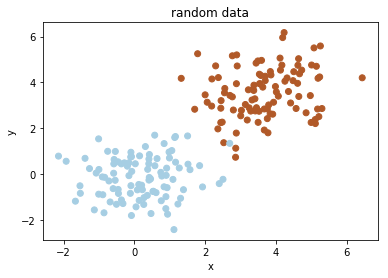

In [19]:
import matplotlib.pyplot as plt

#绘制出数据集的散点图
plt.scatter(res['x'], res['y'], c=res['z'],cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.title('random data')
plt.show()

In [20]:
#重置数据集索引，应为合并后数据索引重复
res.reset_index(inplace=True, drop=True)
#取索引是4的整数倍的的数据做为测试集
test=res[(res.index%4==0)]
#取索引不是4的整数倍的的数据做为训练集
train=res[(res.index%4!=0)]

In [21]:
#选择训练集的特征
X=train[['x','y']]
#选择训练集的标签
Z = train['z']

In [22]:
from sklearn import svm
#新建SVC分类器
clf = svm.SVC(kernel='linear')
#训练
clf.fit(X, Z)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
#在训练集上的准确率
clf.score(X, Z)

0.9933333333333333

In [24]:
#在测试集上的准确率
clf.score(test[['x','y']],test['z'])

1.0

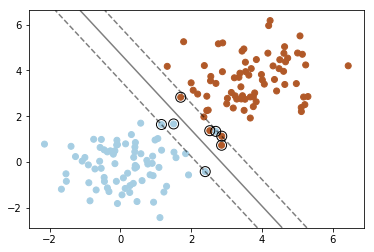

In [25]:
plt.scatter(X['x'], X['y'], c=Z,cmap=plt.cm.Paired)
#坐标系
ax = plt.gca()
#获得坐标系边界
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# 0-1生成300个点
xx = np.linspace(xlim[0], xlim[1], 300)
yy = np.linspace(ylim[0], ylim[1], 300)
#生成网格坐标
YY, XX = np.meshgrid(yy, xx)
#将网格坐标组成样本
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#求xy到分界线的函数距离
height = clf.decision_function(xy).reshape(XX.shape)
# 绘制等高线线,levels=[-1, 0, 1]表示绘制距离
ax.contour(XX, YY, height, colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
# 绘制出支持向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')

plt.show()